In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [95]:
#df = pd.read_csv('NTU_1317_Member.csv',encoding = 'big5')

 - 將顧客購買管道與物品利用 SVM 去做分類

In [96]:
# df_train = pd.read_csv(r'iris_train.csv')
# df_test = pd.read_csv(r'iris-label-species.csv')
df_train = pd.read_csv(r'Wholesale_customers_training_data.csv')
df_test = pd.read_csv(r'Wholesale_customers_testing_data.csv')

 - Channel 購買管道 、 Region 地區 、 Fresh 鮮食 、 Milk 奶 、 Grocery 雜貨 、 Frozen 冷凍食品 、 Detergents_Paper 洗滌紙 、 Delicassen 熟食

In [97]:
df_train.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [98]:
df_test.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,3,8708,3634,6100,2349,2123,5137
1,1,3,6633,2096,4563,1389,1860,1892
2,1,3,2126,3289,3281,1535,235,4365
3,1,3,97,3605,12400,98,2970,62
4,1,3,4983,4859,6633,17866,912,2435


In [99]:
# X_train = df_train.iloc[:, [2, 3]].values
# y_train = df_train.iloc[:, 4].values
# X_test  = df_test.iloc[:, [2, 3]].values
# y_test  = df_test.iloc[:, 4].values

In [100]:
### use Grocery V.S. Detergents_Paper  & feature = channel
X_train = df_train.iloc[:, [4, 6]].values
y_train = df_train.iloc[:, 0].values
X_test  = df_test.iloc[:, [4, 6]].values
y_test  = df_test.iloc[:, 0].values



In [101]:
# normalization & fit data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [102]:
# Fitting LinearSVC to the Training set
from sklearn.svm import LinearSVC
classifier = LinearSVC()
classifier.fit(X_train, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [103]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [104]:
# # Making the Confusion Matrix
# from sklearn.metrics import confusion_matrix
# cm = confusion_matrix(y_test, y_pred)

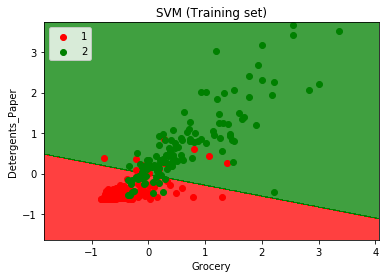

In [105]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.mean())
plt.ylim(X2.min(), X2.mean())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.legend()
plt.show()

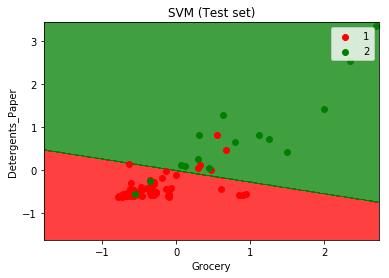

In [106]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.mean())
plt.ylim(X2.min(), X2.mean())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Grocery')
plt.ylabel('Detergents_Paper')
plt.legend()
plt.show()